In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/pluton.csv")
df

,Pu238,Pu239,Pu240,Pu241
0,0.126,75.804,21.204,2.180
1,0.133,75.515,21.408,2.240
2,0.127,75.175,21.668,2.305
3,0.156,78.872,18.428,1.906
4,0.503,73.317,20.223,4.128
5,0.113,79.116,18.548,1.690
6,0.129,75.751,21.162,2.260
7,0.124,75.326,21.557,2.282
8,1.022,63.287,24.493,6.990
9,1.412,59.553,25.576,8.027


In [21]:
df.shape

(45, 4)

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [4]:
def eval_clustering(X, n_clusters=3, max_iter=100, use_scaling=True):
    if use_scaling:
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
    else:
        X_scaled = X

    kmeans = KMeans(
        n_clusters=n_clusters, max_iter=max_iter, random_state=42, n_init=10
    )
    clusters = kmeans.fit_predict(X_scaled)

    inertia = kmeans.inertia_
    silhouette = silhouette_score(X_scaled, clusters)

    return inertia, silhouette

In [5]:
from itertools import product
from tqdm import tqdm

In [17]:
results = []

max_iters = [1, 2, 5, 10, 30]
use_scaling_flags = [True, False]

for max_iter, use_scaling in tqdm(product(max_iters, use_scaling_flags)):
    inertia, silhouette = eval_clustering(
        df, max_iter=max_iter, use_scaling=use_scaling
    )
    results.append(
        {
            "max_iter": max_iter,
            "use_scaling": use_scaling,
            "inertia": inertia,
            "silhouette": silhouette,
        }
    )

10it [00:00, 57.92it/s]


In [18]:
results_df = pd.DataFrame(results)
results_df

,max_iter,use_scaling,inertia,silhouette
0,1,True,18.271529,0.698737
1,1,False,231.174668,0.667890
2,2,True,18.271529,0.698737
3,2,False,231.174668,0.667890
4,5,True,18.271529,0.698737
5,5,False,231.174668,0.667890
6,10,True,18.271529,0.698737
7,10,False,231.174668,0.667890
8,30,True,18.271529,0.698737
9,30,False,231.174668,0.667890


In [19]:
import matplotlib.pyplot as plt

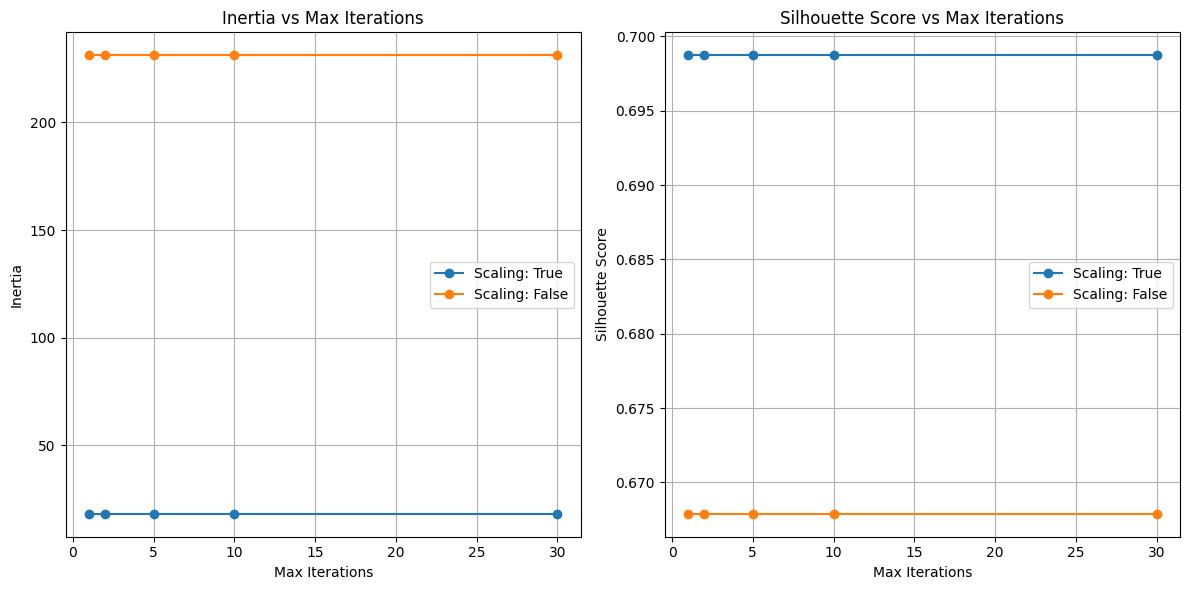

In [20]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
for scaling in use_scaling_flags:
    subset = results_df[results_df["use_scaling"] == scaling]
    plt.plot(
        subset["max_iter"], subset["inertia"], marker="o", label=f"Scaling: {scaling}"
    )
plt.title("Inertia vs Max Iterations")
plt.xlabel("Max Iterations")
plt.ylabel("Inertia")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
for scaling in use_scaling_flags:
    subset = results_df[results_df["use_scaling"] == scaling]
    plt.plot(
        subset["max_iter"],
        subset["silhouette"],
        marker="o",
        label=f"Scaling: {scaling}",
    )
plt.title("Silhouette Score vs Max Iterations")
plt.xlabel("Max Iterations")
plt.ylabel("Silhouette Score")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()